In [1]:
# Using mimize as the library for this question
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Function
def profit(x):
    c, t = x
    return -(2010 * c - 10 * c**2 + 3330 * t - 25 * t**2)

In [3]:
# Constarints
constraints = [
    {'type': 'ineq', 'fun': lambda x: 95 - x[0]},    
    {'type': 'ineq', 'fun': lambda x: 75 - x[1]},     
    {'type': 'ineq', 'fun': lambda x: 125 - (x[0] + x[1])},  
    {'type': 'ineq', 'fun': lambda x: x[0]},         
    {'type': 'ineq', 'fun': lambda x: x[1]}      
]

In [4]:
# Inital guss
initial_guess = [50, 50]
# Solver
result = minimize(profit, initial_guess, constraints=constraints, method='trust-constr')
car_count, truck_count = result.x
max_profit = -result.fun 

C:\Users\noahd\anaconda3\Lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)
C:\Users\noahd\anaconda3\Lib\site-packages\scipy\optimize\_differentiable_functions.py:231: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


In [5]:
print(f"Car production: {car_count}")
print(f"Truck production: {truck_count}")
print(f"Total Profit: ${max_profit}")

Car production: 70.42857113628345
Truck production: 54.57142886084339
Total Profit: $199231.42856970063


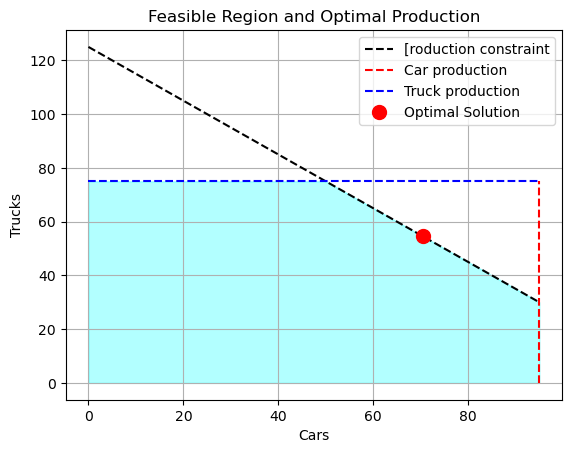

In [6]:
fig, ax = plt.subplots()
x_cars = np.linspace(0, 95, 100)
ax.plot(x_cars, (125 - x_cars), 'k--', label='[roduction constraint')
ax.plot([95, 95], [0, 75], 'r--', label='Car production')
ax.plot(x_cars, [75]*100, 'b--', label='Truck production')
plt.fill_between(x_cars, 0, np.minimum(75, 125 - x_cars), color='cyan', alpha=0.3)
ax.plot(car_count, truck_count, 'ro', markersize=10, label='Optimal Solution', markerfacecolor='red')
ax.set_xlabel('Cars')
ax.set_ylabel('Trucks')
ax.set_title('Feasible Region and Optimal Production')
ax.legend()
plt.grid(True)
plt.show()